# Príprava dát
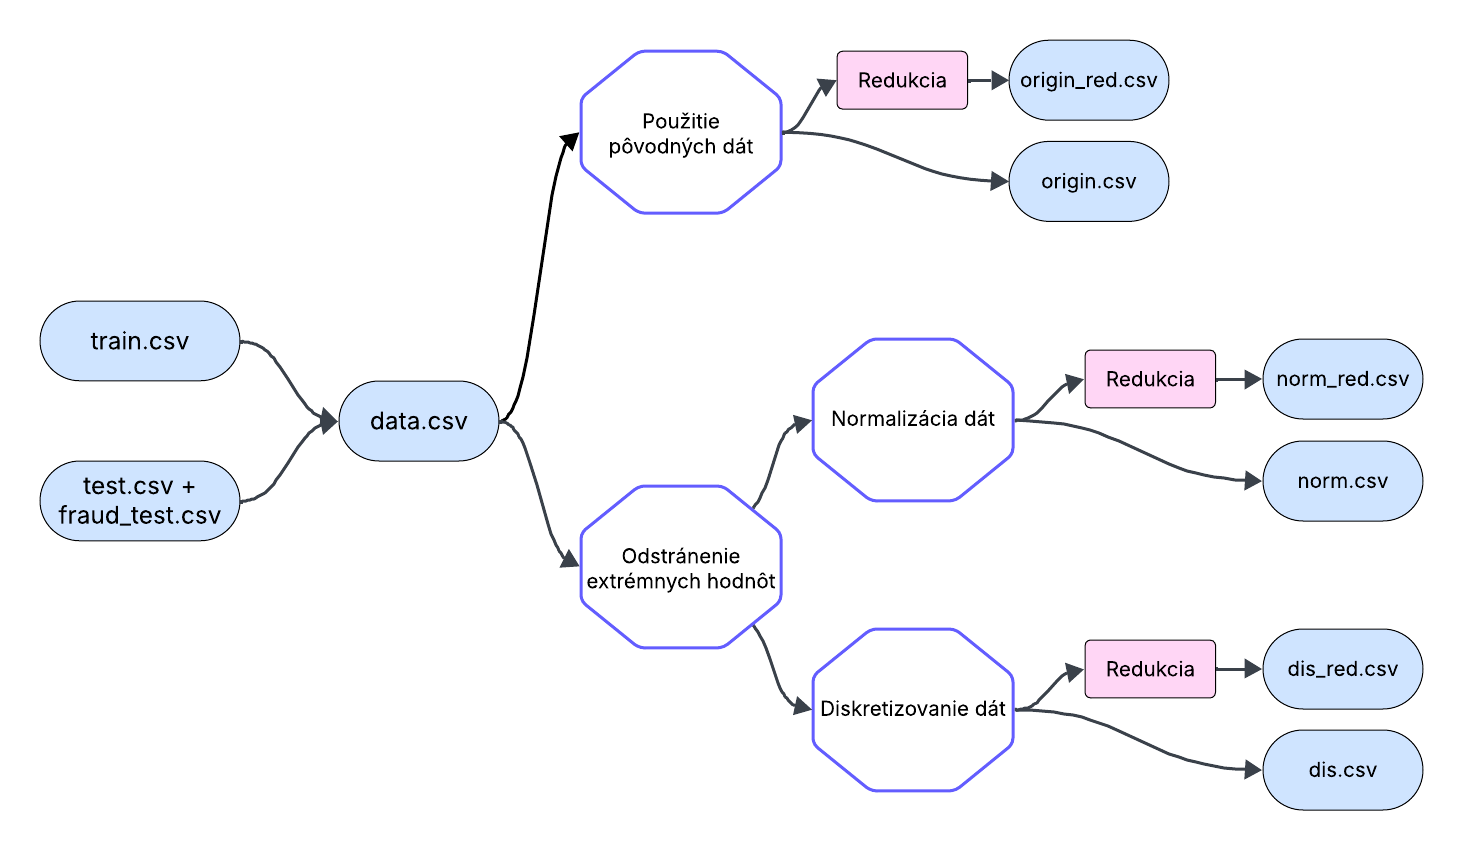
---
## 1. Import knižníc

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 2. Integrácia dát

In [2]:
test1 = pd.read_csv("test.csv", sep="|")
print(test1.count())

test2 = pd.read_csv("fraud_test.csv")
print(test2.count())

test = pd.concat([test1, test2], axis=1)
# print(test.fraud.value_counts())
# print(test.fraud.info())
# print("NaN: ",test.fraud.isna().sum())
test

train = pd.read_csv("train.csv", sep='|')
train

data = pd.concat([test, train], ignore_index=True)
data
data.to_csv("data.csv")

trustLevel                   498121
totalScanTimeInSeconds       498121
grandTotal                   498121
lineItemVoids                498121
scansWithoutRegistration     498121
quantityModifications        498121
scannedLineItemsPerSecond    498121
valuePerSecond               498121
lineItemVoidsPerPosition     498121
dtype: int64
fraud    498121
dtype: int64


## 3. Použitie pôvodných dát

### a) bez redukcie

In [3]:
origin =  pd.read_csv("data.csv", sep=',', index_col=0)
origin.to_csv("origin.csv")
origin

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0
...,...,...,...,...,...,...,...,...,...,...
499995,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
499996,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
499997,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
499998,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0


### b) s redukciou

In [4]:
origin_red = origin.copy()

redukovane = ['trustLevel', 'totalScanTimeInSeconds', 'lineItemVoids', 'scansWithoutRegistration', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'fraud'] 
origin_red = origin_red[redukovane]

origin_red.to_csv("origin_red.csv")
origin_red

,trustLevel,totalScanTimeInSeconds,lineItemVoids,scansWithoutRegistration,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,4,8,0.014989,0.189465,0.571429,0
1,3,1004,7,6,0.026892,0.058755,0.259259,0
2,1,162,4,5,0.006173,0.086420,4.000000,0
3,5,532,9,3,0.026316,0.159380,0.642857,0
4,5,890,4,0,0.021348,0.047371,0.210526,0
...,...,...,...,...,...,...,...,...
499995,1,321,8,7,0.071651,0.236854,0.347826,0
499996,1,397,5,5,0.065491,0.105516,0.192308,1
499997,4,316,5,8,0.094937,0.132373,0.166667,0
499998,2,685,1,6,0.035036,0.091504,0.041667,0


## 4. Odstránenie outlierov

- odstraňujeme ich v atribútoch *scannedLineItemsPerSecond*, *valuePerSecond* a *lineItemVoidsPerPosition*

In [5]:
no_out = origin.copy()

# scannedLineItemsPerSecond
Q1 = no_out['scannedLineItemsPerSecond'].quantile(0.25)
Q3 = no_out['scannedLineItemsPerSecond'].quantile(0.75)
IQR = Q3 - Q1

ciste1 = []

for index, row in no_out.iterrows():
    value = row['scannedLineItemsPerSecond']
    
    if (value >= Q1 - 1.5 * IQR) and (value <= Q3 + 1.5 * IQR):
        ciste1.append(row)

no_out = pd.DataFrame(ciste1)

# valuePerSecond
Q1 = no_out['valuePerSecond'].quantile(0.25)
Q3 = no_out['valuePerSecond'].quantile(0.75)
IQR = Q3 - Q1

ciste2 = []

for index, row in no_out.iterrows():
    value = row['valuePerSecond']
    
    if (value >= Q1 - 1.5 * IQR) and (value <= Q3 + 1.5 * IQR):
        ciste2.append(row)

no_out = pd.DataFrame(ciste2)

# lineItemVoidsPerPosition
Q1 = no_out['lineItemVoidsPerPosition'].quantile(0.25)
Q3 = no_out['lineItemVoidsPerPosition'].quantile(0.75)
IQR = Q3 - Q1

ciste3 = []

for index, row in no_out.iterrows():
    value = row['lineItemVoidsPerPosition']
    
    if (value >= Q1 - 1.5 * IQR) and (value <= Q3 + 1.5 * IQR):
        ciste3.append(row)

no_out = pd.DataFrame(ciste3)
no_out

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
1,3.0,1004.0,58.99,7.0,6.0,1.0,0.026892,0.058755,0.259259,0.0
3,5.0,532.0,84.79,9.0,3.0,4.0,0.026316,0.159380,0.642857,0.0
4,5.0,890.0,42.16,4.0,0.0,0.0,0.021348,0.047371,0.210526,0.0
5,5.0,1072.0,12.67,3.0,4.0,1.0,0.019590,0.011819,0.142857,0.0
7,2.0,1528.0,47.35,2.0,9.0,5.0,0.009817,0.030988,0.133333,0.0
...,...,...,...,...,...,...,...,...,...,...
499992,3.0,1434.0,69.97,8.0,1.0,4.0,0.010460,0.048794,0.533333,0.0
499994,2.0,767.0,50.95,7.0,2.0,0.0,0.022164,0.066428,0.411765,0.0
499996,1.0,397.0,41.89,5.0,5.0,0.0,0.065491,0.105516,0.192308,1.0
499998,2.0,685.0,62.68,1.0,6.0,2.0,0.035036,0.091504,0.041667,0.0


- Kontrola počtu outlierov

In [6]:
Q1 = no_out.quantile(0.25)
#print(Q1)
Q3 = no_out.quantile(0.75)
#print(Q3)
IQR = Q3 - Q1
#print(IQR)

outliers = ((no_out < (Q1 - 1.5 * IQR)) | (no_out > (Q3 + 1.5 * IQR)))

outlier_counts = outliers.sum()

outlier_table = pd.DataFrame({
    'Počet outlierov': outlier_counts,
    'Percento': (outlier_counts / len(no_out))
})
#outlier_table.to_excel('tabulka_out_no_out.xlsx')
print(outlier_table)

                           Počet outlierov  Percento
trustLevel                               0  0.000000
totalScanTimeInSeconds                   0  0.000000
grandTotal                               0  0.000000
lineItemVoids                            0  0.000000
scansWithoutRegistration                 0  0.000000
quantityModifications                    0  0.000000
scannedLineItemsPerSecond            19246  0.052967
valuePerSecond                       10668  0.029360
lineItemVoidsPerPosition             16213  0.044620
fraud                                21455  0.059047


## 5. Použitie normalizácie

### a) bez redukcie

In [7]:
norm = no_out.copy()

scaler = MinMaxScaler(feature_range=(0, 1))

norm[["totalScanTimeInSeconds", 
      "grandTotal", 
      "scannedLineItemsPerSecond", 
      "valuePerSecond", 
      "lineItemVoidsPerPosition"]] = scaler.fit_transform(norm[[
    "totalScanTimeInSeconds", 
    "grandTotal", 
    "scannedLineItemsPerSecond", 
    "valuePerSecond", 
    "lineItemVoidsPerPosition"
]])

norm
norm.to_csv("norm.csv")

### b) s redukciou

In [8]:
norm_red = norm.copy()

redukovane = ['trustLevel', 'totalScanTimeInSeconds', 'lineItemVoids', 'scansWithoutRegistration', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'fraud'] 
norm_red = norm_red[redukovane]

norm_red.to_csv("norm_red.csv")
norm_red

,trustLevel,totalScanTimeInSeconds,lineItemVoids,scansWithoutRegistration,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
1,3.0,0.539789,7.0,6.0,0.369845,0.337950,0.172840,0.0
3,5.0,0.277129,9.0,3.0,0.361750,0.916729,0.428571,0.0
4,5.0,0.476349,4.0,0.0,0.292017,0.272470,0.140351,0.0
5,5.0,0.577629,3.0,4.0,0.267328,0.067981,0.095238,0.0
7,2.0,0.831386,2.0,9.0,0.130139,0.178240,0.088889,0.0
...,...,...,...,...,...,...,...,...
499992,3.0,0.779076,8.0,1.0,0.139173,0.280654,0.355556,0.0
499994,2.0,0.407902,7.0,2.0,0.303472,0.382082,0.274510,0.0
499996,1.0,0.202003,5.0,5.0,0.911688,0.606915,0.128205,1.0
499998,2.0,0.362270,1.0,6.0,0.484170,0.526316,0.027778,0.0


## 6. Použitie diskretizácie

### a) bez redukcie

In [9]:
dis = no_out.copy()
#print(dis.to_string())

dis.totalScanTimeInSeconds = pd.cut(dis.totalScanTimeInSeconds, bins=12, labels=[1,2,3,4,5,6,7,8,9,10,11,12])
dis.grandTotal = pd.cut(dis.grandTotal, bins=12, labels=[1,2,3,4,5,6,7,8,9,10,11,12])
dis.scannedLineItemsPerSecond = pd.cut(dis.scannedLineItemsPerSecond, bins=12, labels=[1,2,3,4,5,6,7,8,9,10,11,12])
dis.valuePerSecond = pd.cut(dis.valuePerSecond, bins=12, labels=[1,2,3,4,5,6,7,8,9,10,11,12])
dis.lineItemVoidsPerPosition = pd.cut(dis.lineItemVoidsPerPosition, bins=12, labels=[1,2,3,4,5,6,7,8,9,10,11,12])
#dis.info()

dis.totalScanTimeInSeconds = dis.totalScanTimeInSeconds.astype('int64')
dis.grandTotal = dis.grandTotal.astype('int64')
dis.scannedLineItemsPerSecond = dis.scannedLineItemsPerSecond.astype('int64')
dis.valuePerSecond = dis.valuePerSecond.astype('int64')
dis.lineItemVoidsPerPosition = dis.lineItemVoidsPerPosition.astype('int64')
#dis.info()

dis.to_csv("dis.csv")
dis

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
1,3.0,7,8,7.0,6.0,1.0,5,5,3,0.0
3,5.0,4,11,9.0,3.0,4.0,5,12,6,0.0
4,5.0,6,6,4.0,0.0,0.0,4,4,2,0.0
5,5.0,7,2,3.0,4.0,1.0,4,1,2,0.0
7,2.0,10,6,2.0,9.0,5.0,2,3,2,0.0
...,...,...,...,...,...,...,...,...,...,...
499992,3.0,10,9,8.0,1.0,4.0,2,4,5,0.0
499994,2.0,5,7,7.0,2.0,0.0,4,5,4,0.0
499996,1.0,3,6,5.0,5.0,0.0,11,8,2,1.0
499998,2.0,5,8,1.0,6.0,2.0,6,7,1,0.0


### b) s redukciou

In [10]:
dis_red = dis.copy()

redukovane = ['trustLevel', 'totalScanTimeInSeconds', 'lineItemVoids', 'scansWithoutRegistration', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'fraud'] 
dis_red = dis_red[redukovane]

dis_red.to_csv("dis_red.csv")
dis_red

,trustLevel,totalScanTimeInSeconds,lineItemVoids,scansWithoutRegistration,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
1,3.0,7,7.0,6.0,5,5,3,0.0
3,5.0,4,9.0,3.0,5,12,6,0.0
4,5.0,6,4.0,0.0,4,4,2,0.0
5,5.0,7,3.0,4.0,4,1,2,0.0
7,2.0,10,2.0,9.0,2,3,2,0.0
...,...,...,...,...,...,...,...,...
499992,3.0,10,8.0,1.0,2,4,5,0.0
499994,2.0,5,7.0,2.0,4,5,4,0.0
499996,1.0,3,5.0,5.0,11,8,2,1.0
499998,2.0,5,1.0,6.0,6,7,1,0.0
